In [226]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTEENN
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
from sklearn.dummy import DummyClassifier

In [227]:
games = pd.read_csv("games.csv")

In [228]:
df = pd.DataFrame(games)
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [229]:
df.columns

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')

In [230]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

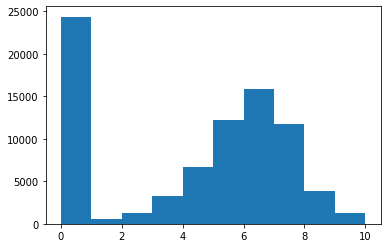

In [231]:
plt.hist(games["average_rating"])
plt.show()

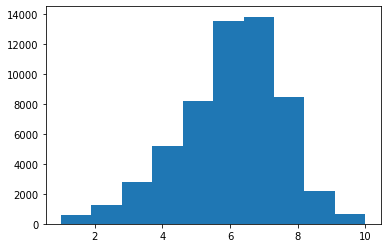

In [232]:
#Removing all rows without any user review
games = games[games["users_rated"] > 0]

#Removing rows with missing values
games = games.dropna(axis=0)

plt.hist(games["average_rating"])
plt.show()

#### Eliminating not a number and infinite values

In [233]:
(df.replace(-np.inf, np.nan))
df.dropna(inplace=True)
df.shape

(81268, 20)

#### Converting floating values to integer values

In [234]:
floatColumns = ["yearpublished", "bayes_average_rating", "average_weight",
               "minplayers", "maxplayers", "playingtime", "minplaytime", "maxplaytime",
               "minage", "average_rating"]
df[list(floatColumns)] = df[list(floatColumns)].astype(int)
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005,2,2,180,180,180,13,20113,8,8,26647,372,1219,5865,5347,2562,3
1,120677,boardgame,Terra Mystica,2012,2,5,150,60,150,12,14383,8,8,16519,132,1586,6277,2526,1423,3
2,102794,boardgame,Caverna: The Cave Farmers,2013,1,7,210,30,210,12,9262,8,8,12230,99,1476,5600,1700,777,3
3,25613,boardgame,Through the Ages: A Story of Civilization,2006,2,4,240,240,240,12,13294,8,8,14343,362,1084,5075,3378,1642,4
4,3076,boardgame,Puerto Rico,2002,2,5,150,90,150,12,39883,8,8,44362,795,861,5414,9173,5213,3


#### Introducing parameter - isGood

In [235]:
print(df["users_rated"].mean())
print(df["average_rating"].mean())
print(df["total_wishers"].mean())
print(df["total_wanters"].mean())
print(df["maxplaytime"].mean())

df['isGood'] = np.where(((df['average_rating']>=7) & (df["users_rated"]>162)
                               & (df['total_wishers']>=43) & (df['total_wishers']>=13)
                               & (df['maxplaytime']>=52)), '1', '0')
df.head()

161.97055421568146
3.9528227592656395
42.74159570802776
12.695575134124132
51.64102721858542


,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,...,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight,isGood
0,12333,boardgame,Twilight Struggle,2005,2,2,180,180,180,13,...,8,8,26647,372,1219,5865,5347,2562,3,1
1,120677,boardgame,Terra Mystica,2012,2,5,150,60,150,12,...,8,8,16519,132,1586,6277,2526,1423,3,1
2,102794,boardgame,Caverna: The Cave Farmers,2013,1,7,210,30,210,12,...,8,8,12230,99,1476,5600,1700,777,3,1
3,25613,boardgame,Through the Ages: A Story of Civilization,2006,2,4,240,240,240,12,...,8,8,14343,362,1084,5075,3378,1642,4,1
4,3076,boardgame,Puerto Rico,2002,2,5,150,90,150,12,...,8,8,44362,795,861,5414,9173,5213,3,1


In [236]:
#Get all the columns from the dataframe
columns = df.columns.tolist()

#Filter the columns to remove the data that we do not need
columns = [c for c in columns if c not in ["bayes_average_rating", "type", "name", "id"]]

In [237]:
input_data_df_categorical = df[columns]
display(input_data_df_categorical.head(2))

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight,isGood
0,2005,2,2,180,180,180,13,20113,8,26647,372,1219,5865,5347,2562,3,1
1,2012,2,5,150,60,150,12,14383,8,16519,132,1586,6277,2526,1423,3,1


In [238]:
input_data_df_categorical.columns

Index(['yearpublished', 'minplayers', 'maxplayers', 'playingtime',
       'minplaytime', 'maxplaytime', 'minage', 'users_rated', 'average_rating',
       'total_owners', 'total_traders', 'total_wanters', 'total_wishers',
       'total_comments', 'total_weights', 'average_weight', 'isGood'],
      dtype='object')

In [239]:
input_data_df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81268 entries, 0 to 81311
Data columns (total 17 columns):
yearpublished     81268 non-null int32
minplayers        81268 non-null int32
maxplayers        81268 non-null int32
playingtime       81268 non-null int32
minplaytime       81268 non-null int32
maxplaytime       81268 non-null int32
minage            81268 non-null int32
users_rated       81268 non-null int64
average_rating    81268 non-null int32
total_owners      81268 non-null int64
total_traders     81268 non-null int64
total_wanters     81268 non-null int64
total_wishers     81268 non-null int64
total_comments    81268 non-null int64
total_weights     81268 non-null int64
average_weight    81268 non-null int32
isGood            81268 non-null object
dtypes: int32(9), int64(7), object(1)
memory usage: 8.4+ MB


#### Setting target to isGood class

In [240]:
target = input_data_df_categorical['isGood']
input_data_df_categorical.drop('isGood',inplace=True, axis=1)
input_data_df_categorical.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,2005,2,2,180,180,180,13,20113,8,26647,372,1219,5865,5347,2562,3
1,2012,2,5,150,60,150,12,14383,8,16519,132,1586,6277,2526,1423,3
2,2013,1,7,210,30,210,12,9262,8,12230,99,1476,5600,1700,777,3
3,2006,2,4,240,240,240,12,13294,8,14343,362,1084,5075,3378,1642,4
4,2002,2,5,150,90,150,12,39883,8,44362,795,861,5414,9173,5213,3


In [241]:
target.head()

0    1
1    1
2    1
3    1
4    1
Name: isGood, dtype: object

#### Count Plot for class isGood

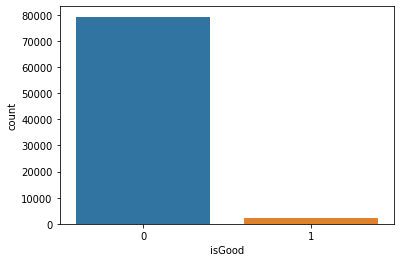

In [225]:
X = input_data_df_categorical
y = target
sns.countplot(x= target)

It can be clearly seen that there is a severe class imbalance.

#### Oversampling

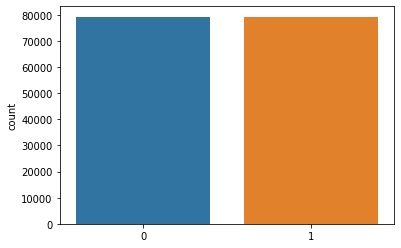

In [242]:
X_oversampled, y_oversampled = SMOTE().fit_resample(X, y)
X_oversampled = pd.DataFrame(X_oversampled, columns=input_data_df_categorical.columns)
sns.countplot(x= y_oversampled)

#### Undersampling

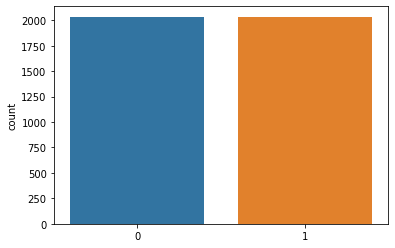

In [243]:
X_undersample, y_undersample = NearMiss().fit_resample(X, y)
X_undersample = pd.DataFrame(X_undersample, columns=input_data_df_categorical.columns)
sns.countplot(x= y_undersample)

__Balancedsampling__

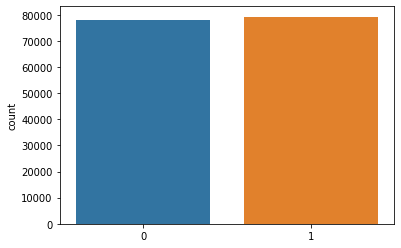

In [244]:
X_balancesampled, y_balancesampled = SMOTEENN(random_state=0).fit_resample(X, y)
X_balancesampled = pd.DataFrame(X_balancesampled, columns=input_data_df_categorical.columns)
sns.countplot(x= y_balancesampled)

In [245]:
def classifier (model,name, X,y):
    scores=[]  
    prediction = []
    accuracy = []
    scores = cross_val_score(model, X, y, cv=10)
    predictions = cross_val_predict(model, X, y, cv=10)
    accuracy = metrics.accuracy_score(y_true=y, y_pred=predictions)
    print("Accuracy :")  
    print(accuracy)
    print()
    classification_rep = classification_report(y_true=y, y_pred=predictions)   
    print(classification_rep)
    cm= confusion_matrix(y, predictions )
    a = pd.DataFrame(cm, columns = ['0','1'], index = ['0','1'])
    print(a)

#### Linear Classifier - Linear Support Vector Classification

Oversampling Results

In [246]:
scaler = MinMaxScaler()
X_oversampled = scaler.fit_transform(X_oversampled)
X_oversampled = pd.DataFrame(X_oversampled, columns=input_data_df_categorical.columns)
y_oversampled = pd.Series(y_oversampled,dtype="category")

In [247]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
lsvc = LinearSVC(random_state=0, tol=1e-05)
lsvc_data = classifier(lsvc, "LSVC", X_oversampled,y_oversampled)

Accuracy :
0.94448651445736

              precision    recall  f1-score   support

           0       0.97      0.92      0.94     79233
           1       0.92      0.97      0.95     79233

    accuracy                           0.94    158466
   macro avg       0.95      0.94      0.94    158466
weighted avg       0.95      0.94      0.94    158466

       0      1
0  72712   6521
1   2276  76957


#### Balanced Sampling

In [248]:
scaler = MinMaxScaler()
X_balancesampled = scaler.fit_transform(X_balancesampled)
X_balancesampled = pd.DataFrame(X_balancesampled, columns=input_data_df_categorical.columns)
y_balancesampled = pd.Series(y_balancesampled,dtype="category")

In [249]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
lsvc = LinearSVC(random_state=0, tol=1e-05)
lsvc_data = classifier(lsvc, "LSVC", X_balancesampled,y_balancesampled)

Accuracy :
0.9592977719478105

              precision    recall  f1-score   support

           0       0.97      0.94      0.96     77823
           1       0.95      0.98      0.96     79220

    accuracy                           0.96    157043
   macro avg       0.96      0.96      0.96    157043
weighted avg       0.96      0.96      0.96    157043

       0      1
0  73326   4497
1   1895  77325


#### Under Sampling Results

In [250]:
scaler = MinMaxScaler()
X_undersample = scaler.fit_transform(X_undersample)
X_undersample = pd.DataFrame(X_undersample, columns=input_data_df_categorical.columns)
y_undersample = pd.Series(y_undersample,dtype="category")

In [251]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
lsvc = LinearSVC(random_state=0, tol=1e-05)
lsvc_data = classifier(lsvc, "LSVC", X_undersample,y_undersample)

Accuracy :
0.8997542997542998

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2035
           1       0.91      0.89      0.90      2035

    accuracy                           0.90      4070
   macro avg       0.90      0.90      0.90      4070
weighted avg       0.90      0.90      0.90      4070

      0     1
0  1859   176
1   232  1803


### Tree Based Classifier - Decision Tree Classification

#### Oversampling Results

In [252]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0)
dtc_data = classifier(dtc, "DTC", X_oversampled,y_oversampled)

Accuracy :
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79233
           1       1.00      1.00      1.00     79233

    accuracy                           1.00    158466
   macro avg       1.00      1.00      1.00    158466
weighted avg       1.00      1.00      1.00    158466

       0      1
0  79233      0
1      0  79233


#### Balanced Sampling Results

In [253]:
dtc = DecisionTreeClassifier(random_state=0)
dtc_data = classifier(dtc, "DTC", X_balancesampled,y_balancesampled)

Accuracy :
0.9999936323172635

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77823
           1       1.00      1.00      1.00     79220

    accuracy                           1.00    157043
   macro avg       1.00      1.00      1.00    157043
weighted avg       1.00      1.00      1.00    157043

       0      1
0  77822      1
1      0  79220


#### Undersampling Results

In [254]:
dtc = DecisionTreeClassifier(random_state=0)
dtc_data = classifier(dtc, "DTC", X_undersample,y_undersample)

Accuracy :
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2035
           1       1.00      1.00      1.00      2035

    accuracy                           1.00      4070
   macro avg       1.00      1.00      1.00      4070
weighted avg       1.00      1.00      1.00      4070

      0     1
0  2035     0
1     0  2035


### Distance based classifier - KNN

#### Oversampling Results

In [255]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_data = classifier(knn, "KNN", X_oversampled,y_oversampled)

Accuracy :
0.9892216626910505

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     79233
           1       0.98      1.00      0.99     79233

    accuracy                           0.99    158466
   macro avg       0.99      0.99      0.99    158466
weighted avg       0.99      0.99      0.99    158466

       0      1
0  77569   1664
1     44  79189


#### Balanced Sampling Results

In [256]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_data = classifier(knn, "KNN", X_balancesampled,y_balancesampled)

Accuracy :
0.9920849703584369

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     77823
           1       0.99      1.00      0.99     79220

    accuracy                           0.99    157043
   macro avg       0.99      0.99      0.99    157043
weighted avg       0.99      0.99      0.99    157043

       0      1
0  76621   1202
1     41  79179


#### Undersampling Results

In [257]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_data = classifier(knn, "KNN", X_undersample,y_undersample)

Accuracy :
0.8958230958230958

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      2035
           1       0.91      0.88      0.89      2035

    accuracy                           0.90      4070
   macro avg       0.90      0.90      0.90      4070
weighted avg       0.90      0.90      0.90      4070

      0     1
0  1848   187
1   237  1798


### Rule Based Classifier - Dummy Classifier

#### Oversampling Results

In [258]:
dm = DummyClassifier(strategy= 'stratified', random_state=None, constant=None)
dm_data = classifier(dm, "DummyClassifier", X_oversampled,y_oversampled)

Accuracy :
0.49956457536632465

              precision    recall  f1-score   support

           0       0.50      0.50      0.50     79233
           1       0.50      0.50      0.50     79233

    accuracy                           0.50    158466
   macro avg       0.50      0.50      0.50    158466
weighted avg       0.50      0.50      0.50    158466

       0      1
0  39561  39672
1  39630  39603


#### Balanced Sampling

In [259]:
dm = DummyClassifier(strategy= 'stratified', random_state=None, constant=None)
dm_data = classifier(dm, "DummyClassifier", X_balancesampled,y_balancesampled)

Accuracy :
0.4998694625039002

              precision    recall  f1-score   support

           0       0.50      0.49      0.49     77823
           1       0.50      0.51      0.50     79220

    accuracy                           0.50    157043
   macro avg       0.50      0.50      0.50    157043
weighted avg       0.50      0.50      0.50    157043

       0      1
0  38484  39339
1  39203  40017


#### Under Sampling Results

In [260]:
dm = DummyClassifier(strategy= 'stratified', random_state=None, constant=None)
dm_data = classifier(dm, "DummyClassifier", X_undersample,y_undersample)

Accuracy :
0.5024570024570024

              precision    recall  f1-score   support

           0       0.50      0.49      0.49      2035
           1       0.50      0.52      0.51      2035

    accuracy                           0.50      4070
   macro avg       0.50      0.50      0.50      4070
weighted avg       0.50      0.50      0.50      4070

     0     1
0  992  1043
1  982  1053


### Ensemble - Random Forest Classifier

#### Oversampling Results

In [261]:
clf=RandomForestClassifier(n_estimators=100)
clf_rfc = classifier(clf,'Random Forest',X_oversampled,y_oversampled)

Accuracy :
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     79233
           1       1.00      1.00      1.00     79233

    accuracy                           1.00    158466
   macro avg       1.00      1.00      1.00    158466
weighted avg       1.00      1.00      1.00    158466

       0      1
0  79233      0
1      0  79233


####  Balanced Sampling Results

In [262]:
clf=RandomForestClassifier(n_estimators=100)
clf_rfc = classifier(clf,'Random Forest',X_balancesampled,y_balancesampled)

Accuracy :
1.0

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     77823
           1       1.00      1.00      1.00     79220

    accuracy                           1.00    157043
   macro avg       1.00      1.00      1.00    157043
weighted avg       1.00      1.00      1.00    157043

       0      1
0  77823      0
1      0  79220


#### Undersampling Results

In [263]:
clf=RandomForestClassifier(n_estimators=100)
clf_rfc = classifier(clf,'Random Forest', X_undersample,y_undersample)

Accuracy :
0.9938574938574939

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2035
           1       1.00      0.99      0.99      2035

    accuracy                           0.99      4070
   macro avg       0.99      0.99      0.99      4070
weighted avg       0.99      0.99      0.99      4070

      0     1
0  2033     2
1    23  2012


Balanced Sampling lead to overall better reults. Hence comparing all the algorithms using balanced sampling.

In [264]:
def classifier_2 (model,name, X,y):
    accuracy = []
    cv = KFold(n_splits=10, random_state=42, shuffle=False)
    for train_index, test_index in cv.split(X):
        X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], y[train_index], y[test_index]
        model.fit(X_train, y_train)   
        prediction = model.predict(X_test)
        acc = metrics.accuracy_score(y_true=y_test, y_pred=prediction)
        accuracy.append(acc)
        
        
    accuracy.append(np.mean(accuracy))
    accuracy.append(np.std(accuracy))
    return accuracy

#### Linear Support Vector

In [265]:
lsvc = LinearSVC(random_state=0, tol=1e-05)
lsvc_data = classifier_2(lsvc, "LSVC", X_balancesampled,y_balancesampled)

#### Decision Tree Classifier

In [266]:
dtc = DecisionTreeClassifier(random_state=0)
dtc_data = classifier_2(dtc, "DTC",X_balancesampled,y_balancesampled)

#### K Nearest Neighbour

In [267]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_data = classifier_2(knn, "KNN",X_balancesampled,y_balancesampled)

#### Rule Based Classifier

In [268]:
dm = DummyClassifier(strategy= 'stratified', random_state=None, constant=None)
dm_accuracy = classifier_2(dm, "DummyClassifier", X_balancesampled,y_balancesampled)

#### Random Forest Classifier

In [269]:
clf=RandomForestClassifier(n_estimators=100)
clf_rfc = classifier_2(clf,'Random Forest',X_balancesampled,y_balancesampled)

In [270]:
columns = ['1','2','3','4','5','6','7','8','9','10','Mean','Std Daviation']
rows = ["Random Forest", "KNN", "Decision Tree", "Linear Support Vector", "Dummy Classifier"]
data =[clf_rfc,knn_data,dtc_data, lsvc_data,dm_accuracy]
df = pd.DataFrame(data=data)
df.index = rows
df.columns = columns
df

,1,2,3,4,5,6,7,8,9,10,Mean,Std Daviation
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
KNN,0.935880,0.998281,0.997962,0.993314,0.989812,0.998281,0.999618,0.999363,0.999554,0.999682,0.991175,0.017817
Decision Tree,1.000000,0.999936,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999994,0.000018
Linear Support Vector,0.770901,0.987202,0.985737,0.962048,0.893148,0.965805,0.966633,0.967524,0.967015,0.965996,0.943201,0.059568
Dummy Classifier,0.445463,0.435339,0.438013,0.439952,0.452050,0.454024,0.448994,0.442817,0.445173,0.445683,0.444751,0.005390


### Feature Selection

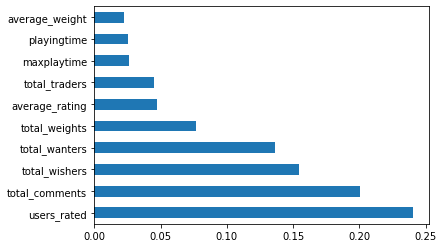

In [271]:
import matplotlib.pyplot as plt
clf.fit(X_balancesampled,y_balancesampled)
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [272]:
selected_feature = feat_importances.nlargest(10)
# selected_feature= pd.DataFrame(selected_feature)
v= pd.DataFrame(selected_feature,columns=['a'])
index = list(v.index)
final_data = X_balancesampled[index]

In [273]:
lsvc = LinearSVC(random_state=0, tol=1e-05)
lsvc_data = classifier_2(lsvc, "LSVC",final_data,y_balancesampled)

In [274]:
dtc = DecisionTreeClassifier(random_state=0)
dtc_data = classifier_2(dtc, "DTC",final_data,y_balancesampled)

In [275]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_data = classifier_2(knn, "KNN",final_data,y_balancesampled)

In [276]:
dm = DummyClassifier(strategy= 'stratified', random_state=None, constant=None)
dm_accuracy = classifier_2(dm, "DummyClassifier", final_data,y_balancesampled)

In [277]:
clf=RandomForestClassifier(n_estimators=100)
clf_rfc = classifier_2(clf,'Random Forest',final_data,y_balancesampled)

In [278]:
columns = ['1','2','3','4','5','6','7','8','9','10','Mean','Std Dev']
rows = ["Random Forest", "KNN", "Decision Tree", "Linear Support Vector", "Dummy Classifier"]
data =[clf_rfc,knn_data,dtc_data, lsvc_data,dm_accuracy]
df = pd.DataFrame(data=data)
df.index = rows
df.columns = columns
df

,1,2,3,4,5,6,7,8,9,10,Mean,Std Dev
Random Forest,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
KNN,0.939382,0.998472,0.997962,0.993632,0.992804,0.999236,0.999618,0.999809,0.999873,0.999809,0.992060,0.016905
Decision Tree,1.000000,0.999936,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999994,0.000018
Linear Support Vector,0.765361,0.982999,0.976059,0.952624,0.884233,0.961921,0.964213,0.963321,0.964468,0.961602,0.937680,0.059954
Dummy Classifier,0.435657,0.433429,0.437822,0.442944,0.446001,0.448039,0.448867,0.447466,0.447338,0.453388,0.444095,0.005845
